# AML - Assignment N°3

>Nome: **Alessandro**  
Cognome: **Pigato**  
N° Matricola: **852482**  

Using the mnist dataset create a CNN with:
  
>* Less than 7000 paramenters


# Import libraries

In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from keras import layers
from keras import models
from keras import optimizers
from sklearn.metrics import classification_report
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import random

# Import Dataset and Exploration

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

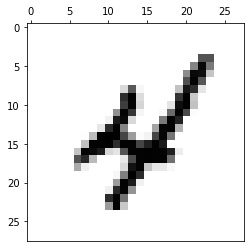

In [5]:
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
imgplot = ax.imshow(train_images[random.randint(0,9)], cmap=mpl.cm.Greys)
imgplot.set_interpolation('nearest')
ax.xaxis.set_ticks_position('top')
ax.yaxis.set_ticks_position('left')
pyplot.show()

## Pre Process

In [3]:
#Number of channels 
channels = 1

#Reshaping on TRAIN 
train_images = train_images.reshape((train_images.shape[0], 
                                     train_images.shape[1], 
                                     train_images.shape[2],
                                     channels))
train_images = train_images.astype('float32') / 255

#Reshaping on TEST 
test_images = test_images.reshape((test_images.shape[0], 
                                   test_images.shape[1], 
                                   test_images.shape[2],
                                   channels))
test_images = test_images.astype('float32') / 255

#Labels transforming into categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [7]:
num_class  = train_labels.shape[1]

In [8]:
train_images.shape[1:]

(28, 28, 1)

# Training

Defining the CNN so that i have less than 7000 total parameters.
>The Conv2D layer: creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.  
Average Pooling layer: average pooling operation for spatial data.  
Flatten layer: with this layer we remove all dimensions except for one.  
Using Relu as activation function and the softmax for the last dense layer, as optimizer adam that is a stochastic gradient descent method based on adaptive estimation of first-order and second-order moments; categorical crossentropy for the loss function and than fit the model with 20 epochs and 128 as batch size.

In [9]:
def CNN(dim_pool):
    
    model = models.Sequential()
    model.add(layers.Conv2D(16,(3,3),activation='relu', input_shape=train_images.shape[1:]))
    model.add(layers.AveragePooling2D(dim_pool))
    model.add(layers.Conv2D(16, (3, 3), activation='relu'))
    model.add(layers.AveragePooling2D(dim_pool))
    model.add(layers.Flatten())
    model.add(layers.Dense(num_class, activation='softmax'))
    model.summary()
    
    return model
model = CNN(dim_pool = (2,2))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
average_pooling2d (AveragePo (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        2320      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                4010      
Total params: 6,490
Trainable params: 6,490
Non-trainable params: 0
______________________________________________________

In [11]:
adam = optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=adam, 
              metrics=['accuracy'])
model_history = model.fit(train_images, train_labels, validation_split = 0.1,
                          batch_size=128, epochs=20, verbose=1)

Epoch 1/20
422/422 [==============================] - 10s 23ms/step - loss: 0.5550 - accuracy: 0.8417 - val_loss: 0.1974 - val_accuracy: 0.9485
Epoch 2/20
422/422 [==============================] - 9s 22ms/step - loss: 0.1869 - accuracy: 0.9467 - val_loss: 0.1206 - val_accuracy: 0.9695
Epoch 3/20
422/422 [==============================] - 9s 22ms/step - loss: 0.1267 - accuracy: 0.9636 - val_loss: 0.0931 - val_accuracy: 0.9752
Epoch 4/20
422/422 [==============================] - 9s 20ms/step - loss: 0.1007 - accuracy: 0.9702 - val_loss: 0.0841 - val_accuracy: 0.9778
Epoch 5/20
422/422 [==============================] - 10s 23ms/step - loss: 0.0879 - accuracy: 0.9743 - val_loss: 0.0747 - val_accuracy: 0.9813
Epoch 6/20
422/422 [==============================] - 10s 23ms/step - loss: 0.0779 - accuracy: 0.9766 - val_loss: 0.0691 - val_accuracy: 0.9838
Epoch 7/20
422/422 [==============================] - 10s 23ms/step - loss: 0.0716 - accuracy: 0.9780 - val_loss: 0.0684 - val_accuracy: 0.

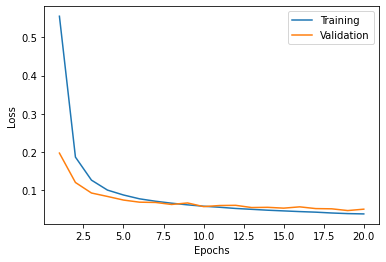

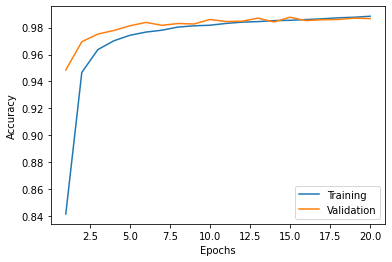

In [19]:
x_plot = list(range(1,20+1))

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(x_plot, network_history.history['loss'])
    plt.plot(x_plot, network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(x_plot, network_history.history['accuracy'])
    plt.plot(x_plot, network_history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

plot_history(model_history)

## Metrics on Train set

In [20]:
y_train_pred = model.predict_classes(train_images)
y_train_true = []
for i in range(len(train_labels)):
    y_train_true.append(np.argmax(train_labels[i]))
y_train_true=np.array(y_train_true)

target_num = ['0','1', '2', '3', '4', '5', '6', '7', '8', '9']
print('Classification Report: TRAIN\n\n', classification_report(y_train_true, y_train_pred, target_names=target_num))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Classification Report: TRAIN

               precision    recall  f1-score   support

           0       0.99      1.00      1.00      5923
           1       0.99      1.00      0.99      6742
           2       1.00      0.98      0.99      5958
           3       0.98      0.99      0.99      6131
           4       0.99      0.99      0.99      5842
           5       0.99      0.99      0.99      5421
           6       0.99      0.99      0.99      5918
           7       0.98      0.99      0.99      6265
           8       0.98      0.99      0.98      5851
           9       0.99      0.98      0.98      5949

    accuracy                           

The model performs very well on training and validation set, now let's see how performs on unseen data.

## Metrics on Test set

In [21]:
y_test_pred = model.predict_classes(test_images)
y_test_true = []
for i in range(len(test_labels)):
    y_test_true.append(np.argmax(test_labels[i]))
y_test_true=np.array(y_test_true)

target_num = ['0','1', '2', '3', '4', '5', '6', '7', '8', '9']
print('Classification Report: TEST\n\n',classification_report(y_test_true, y_test_pred, target_names=target_num))

Classification Report: TEST

               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.97      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## Conclusion

As we can see the model perform well both on the train and test set with 0.99 accuracy, only few observations have not been classified correctly